<h2> Problem Statement </h2>

<h3> About Company</h3>

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

<h3> Problem </h3>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

<h3> Evaluation Criteria </h3>
Come up with the most accurate model i.e., percent of loan appprovals your model can correctly predict.

<h3> Challenges </h3>
Data contains missing values

<h3> Data </h3>

**Variable** Description<br/>
**Loan_ID** Unique Loan ID<br/>
**Gender** Male/ Female<br/>
**Married** Applicant married (Y/N)<br/>
**Dependents** Number of dependents<br/>
**Education** Applicant Education (Graduate/ Under Graduate)<br/>
**Self_Employed** Self employed (Y/N)<br/>
**ApplicantIncome** Applicant income<br/>
**CoapplicantIncome** Coapplicant income<br/>
**LoanAmount** Loan amount in thousands<br/>
**Loan_Amount_Term** Term of loan in months<br/>
**Credit_History** credit history meets guidelines<br/>
**Property_Area** Urban/ Semi Urban/ Rural<br/>
**Loan_Status** Loan approved (Y/N)<br/>

In [1]:
# import print function
from __future__ import print_function
print('print function ready to serve')

# import Numpy for numeric computation
import numpy as np

# import pandas for data manipulation
import pandas as pd

# import matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# import seaborn for easy visualization
import seaborn as sns

# from sklearn use Imputer() to replace missing values
from sklearn.preprocessing import Imputer

# for creating training and test sets
from sklearn.model_selection import train_test_split

# function to create model pipelines
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

# helper for cross validation
from sklearn.model_selection import GridSearchCV

# import logistic regression
from sklearn.linear_model import LogisticRegression

# import RandomForestClassifier and Gradient Boosting Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# import Knn
from sklearn.neighbors import KNeighborsClassifier

#import decision tree
from sklearn.tree import DecisionTreeClassifier

#import ANN
from sklearn.neural_network import MLPClassifier

#Classification metrics
from sklearn.metrics import accuracy_score

#pickle for saving model files
import pickle

print function ready to serve


In [2]:
# import customer loan prediction training data
df = pd.read_csv('train_LP.csv')

In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<h3> Data Exploration </h3>
Let us explore the data by seeing how data looks like.

In [5]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


We notice missing values in <code>LoanAmount</code>. Let us look at the last few records too.

In [6]:
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Again, we have missing value in <code>LoanAmount</code>. Let us see if any other variables have missing values.

In [7]:
#summarize numeric features
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<code> Loan_Amount_Term </code> has 14 missing values. </br>

<code> LoanAmount </code> has 22 missing values. </br>

<code> Credit_History </code> has 50 missing values. </br>

In [8]:
# summarize categorical features
df.describe(include=['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002767,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


<code> Married </code> has 3 missing values. </br>

<code> Gender </code> has 13 missing values. </br>

<code> Dependents </code> has 15 missing values. </br>

<code> Self_Employed </code> has 32 missing values. </br>

<code> ApplicantIncome </code> and <code> CoapplicantIncome </code>, <code> Education </code>, and <code> Property_Area </code> have no missing values

<h2>Impute Missing Values</h2>

In [9]:
#Replace all categorical missing values by their modes
df.Married.fillna(df['Married'].value_counts().index[0], inplace=True)

In [10]:
df['Gender'].fillna(df['Gender'].value_counts().index[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].value_counts().index[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().index[0], inplace=True)

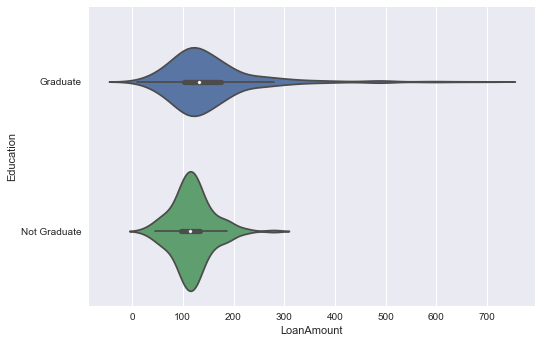

In [11]:
# Segment LoanAmount by Education
sns.violinplot(x="LoanAmount", y="Education",data=df)

Graduates have slightly higher loanamount requests than those who aren't.

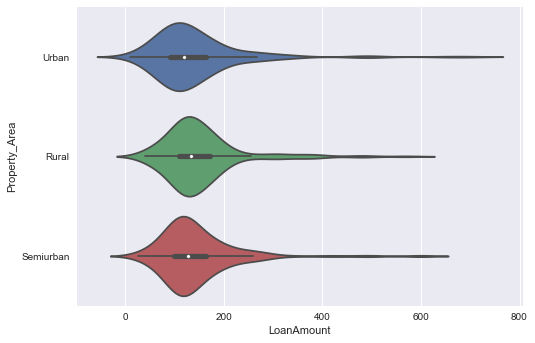

In [12]:
# Segment Loan Amount by Property Area
sns.violinplot(x="LoanAmount",y="Property_Area",data=df)

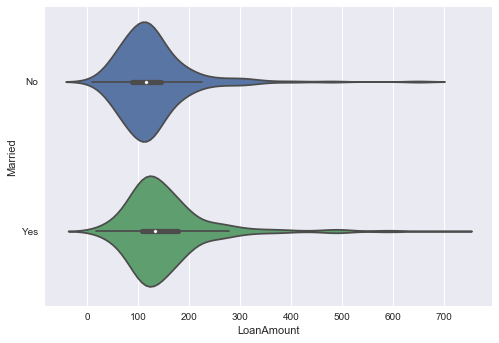

In [13]:
# Segment Loan amount by Married status
sns.violinplot(x="LoanAmount", y="Married",data=df)

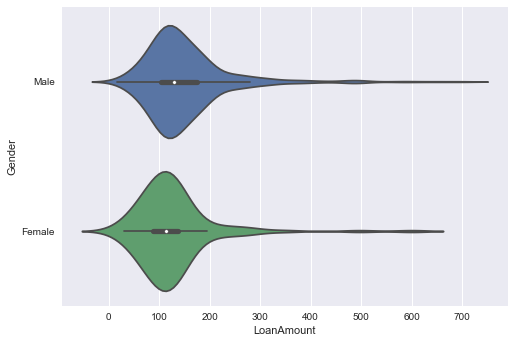

In [14]:
#Segment Loan amount by Gender
sns.violinplot(x="LoanAmount", y="Gender",data=df)

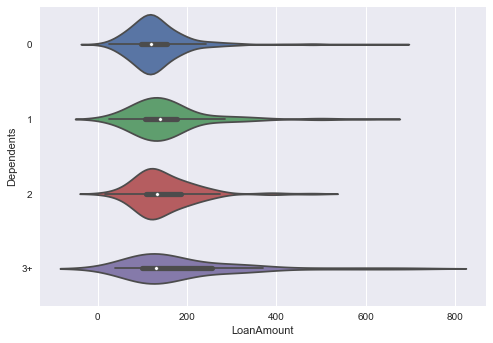

In [15]:
#Segment Loan amount by Dependents
sns.violinplot(x="LoanAmount", y="Dependents",data=df)

It may be worth segmenting LoanAmount by #Dependents

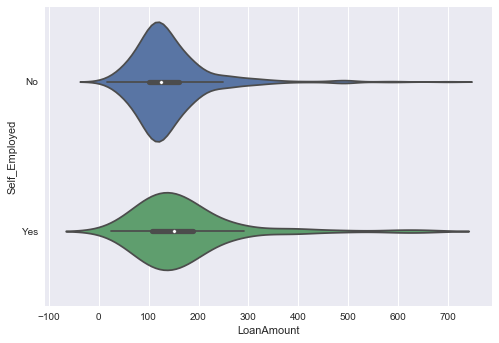

In [16]:
sns.violinplot(x="LoanAmount",y="Self_Employed", data=df)

Since there doesn't seem to be much of a difference in the mean loan amounts when segmented by any of these, let us impute loan amounts by the mean/median loan amount.

In [17]:
df.LoanAmount.fillna(df['LoanAmount'].median(), inplace=True)

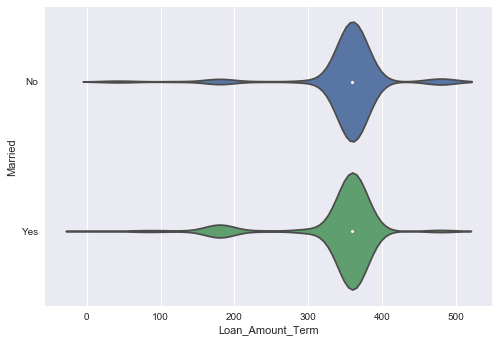

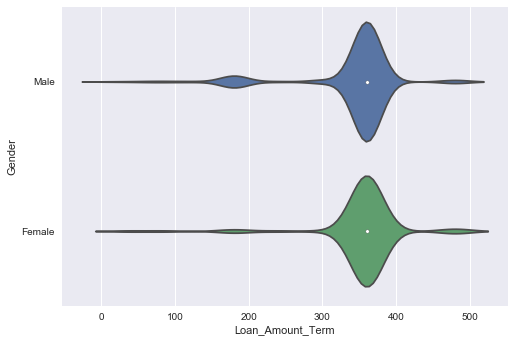

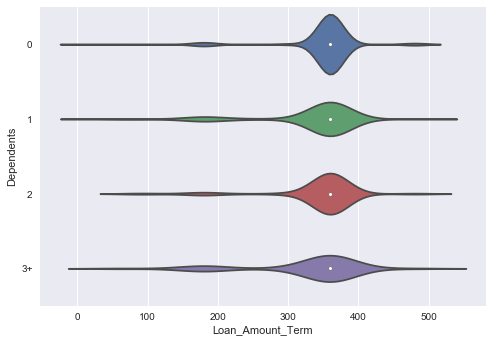

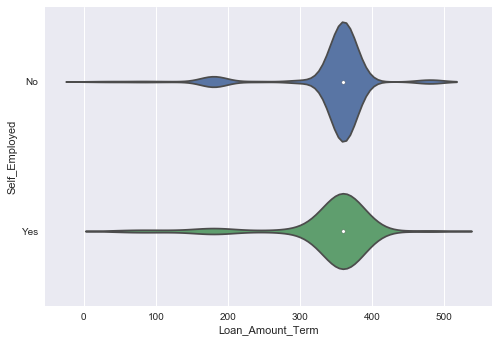

In [18]:
#See if Loan_Amount_Term differs by married, gender, dependents self_employed, 
for var in ['Married','Gender','Dependents','Self_Employed']:
    sns.violinplot(x="Loan_Amount_Term", y=var, data=df)
    plt.show()

No difference, so replace Loan_Amount_Term by its median

In [19]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median(), inplace=True)

Let us check if credit history varies by any of these variables:

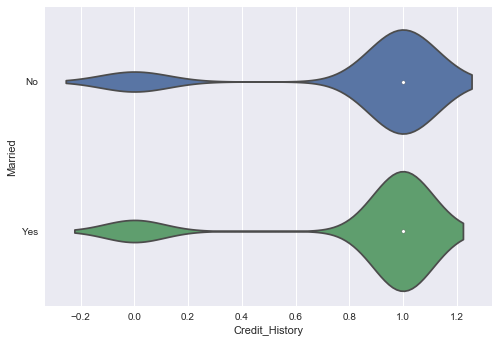

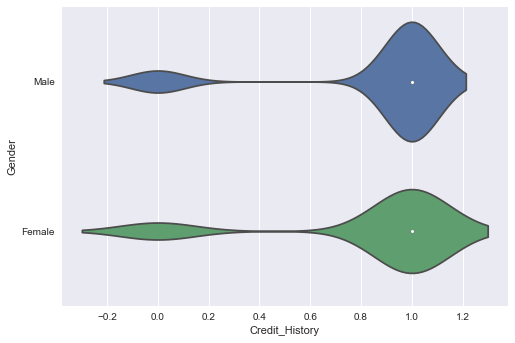

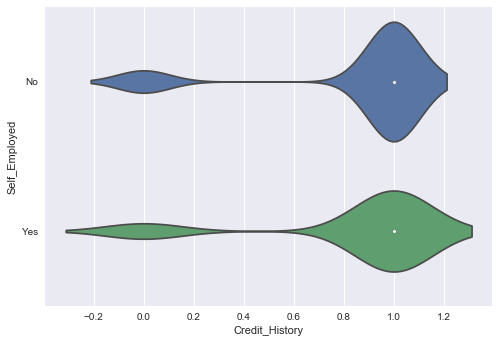

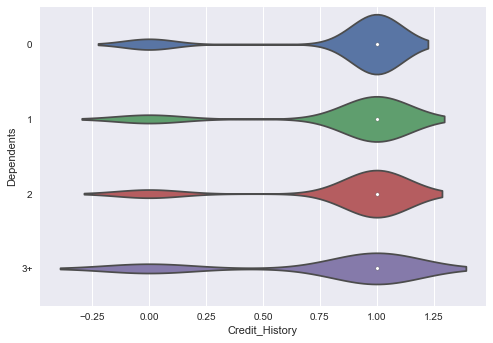

In [20]:
for var in ['Married','Gender','Self_Employed','Dependents']:
    sns.violinplot(x="Credit_History", y=var, data=df)
    plt.show()

Again, not a lot of difference. So we will replace Credit_history also by its mode.

In [21]:
df.Credit_History.fillna(df['Credit_History'].median(), inplace=True)

Let us verify if there are any more missing values in the data.

In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [23]:
df.describe(include=['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP002767,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


No more missing values!

Let us try to engineer features now!

In [43]:
# Drop Loan_ID because we don't use it.
df = df.drop(['Loan_ID'], axis=1)

ValueError: labels ['Loan_ID'] not contained in axis

In [44]:
df.shape

(614, 13)

In [61]:
df.head(10)

,Credit_History,Loan_Status,TotalIncome,UnitLoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,Y,5849.0,0.355556,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1.0,N,6091.0,0.355556,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,1.0,Y,3000.0,0.183333,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,1.0,Y,4941.0,0.333333,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,1.0,Y,6000.0,0.391667,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
5,1.0,Y,9613.0,0.741667,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
6,1.0,Y,3849.0,0.263889,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
7,0.0,N,5540.0,0.438889,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
8,1.0,Y,5532.0,0.466667,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
9,1.0,N,23809.0,0.969444,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0


In [40]:
# Let us create TotalIncome = sum of Applicant and Coapplicant Incomes
df['TotalIncome'] = df.ApplicantIncome + df.CoapplicantIncome

In [46]:
df['UnitLoanAmount'] = df.LoanAmount/df.Loan_Amount_Term

In [58]:
df = df.drop('ApplicantIncome', axis=1)

In [59]:
df = df.drop('CoapplicantIncome', axis=1)

In [60]:
df = df.drop('LoanAmount', axis = 1)
df = df.drop('Loan_Amount_Term', axis = 1)

In [48]:
# create new data frame columns with dummy features
df = pd.get_dummies(df, columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [49]:
# Create separate object for target variable
y = df.Loan_Status

# Create separate object for input features
X = df.drop('Loan_Status', axis=1)

In [62]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234, stratify=df.Loan_Status)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

491 123 491 123


In [75]:
pipelines = {
    'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123)),
    'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=100, random_state=123)),    
    'nn': make_pipeline(StandardScaler(), MLPClassifier(max_iter = 200, alpha=1e-4, tol=1e-4, learning_rate_init=.1, random_state=123))
}

In [76]:
# Hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10)
}
l2_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10)
}
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
}
nn_hyperparameters = {
    'mlpclassifier__max_iter': [200, 400, 600],
    'mlpclassifier__hidden_layer_sizes': [(4,),(8,),(12,),(16,),(40,)],
    'mlpclassifier__activation': ['logistic','tanh','relu']
}
#create dictionary 
hyperparameters = {
    'l1':l1_hyperparameters,
    'l2':l2_hyperparameters,
    'rf':rf_hyperparameters,
    'gb':gb_hyperparameters,
    'nn':nn_hyperparameters
}

In [77]:
#Fit and tune models
#Create empty dictionary for storing fitted models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    
    #Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs = -1)
    
    # Fit model on X, y of the training set
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name]
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.
nn has been fitted.


In [78]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.820773930754
l2 0.820773930754
rf 0.798370672098
gb 0.816700610998
nn 0.792260692464


In [80]:
# Code here
for name, model in fitted_models.items():
    print(name)
    print("--------")
    pred = model.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, pred))
    print()

l1
--------
Accuracy: 0.772357723577

l2
--------
Accuracy: 0.772357723577

rf
--------
Accuracy: 0.772357723577

gb
--------
Accuracy: 0.764227642276

nn
--------
Accuracy: 0.747967479675

